In [1]:
import pandas as pd
import numpy as np

import string
import json
import sys
import csv
import pickle

from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.probability import ELEProbDist, FreqDist
from nltk import NaiveBayesClassifier
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk
import re

In [7]:
data = pd.read_json("data_latih2.json")

In [8]:
import re
isi_dict = list(data["isi"])
clean_regular = []
for regular in isi_dict:
    regular = re.sub('((www\.[\s]+)|(https?://[^\s]+))',' ',regular)
    regular = re.sub('@[^\s]+',' ',regular)
    regular = re.sub('[\s]+', ' ', regular)
    regular = re.sub('#([^\s]+)', ' ', regular)
    regular = regular.strip('\"')
    clean_regular.append(regular)

In [9]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory


In [10]:
import csv
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
#untuk membuat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

with open('key_norm.csv') as filecsv, open('stopword_list_TALA.txt','r') as stp_file, open('hasil_normalisasi.txt','w') as hasil_norm, open('hasil_stemming.txt','w') as hasil_stem, open("hasil_stopword.txt",'w') as hasil_stop, open("hasil_praproses.txt",'w') as hasil_tweet:
    read = csv.reader(filecsv, delimiter=',')
    keys=[]
    results=[]
    clean_norm=[]

    for row in read: # untuk mengubah csv ke dalam array
        keys.append(row[1])
        results.append(row[2])

    gabung=dict(zip(keys,results)) #menggabungkan dua array

    print('Mulai normalisasi')
    clean_digit=[]
    for s in clean_regular:
        c_num = ''.join(i for i in s if not i.isdigit())
        clean_digit.append(c_num)

    for q in clean_digit: 
        temp = q.split()
        # Ambil array Kata
        for i,_ in enumerate(temp):
            if temp[i] in gabung:
                temp[i] = gabung[temp[i]]
        temp2=' '.join(temp)
        clean_norm.append(temp2)
        
#     ##### Menulis hasil Normalisasi ########
#     print ('menulis hasil normalisasi')
#     #menulis hasil tweet
#     hasil_norm.write('[\n')
#     FNL= False
#     for i in clean_norm:
#         if FNL == True:
#             hasil_norm.write(',\n')
#         FNL = True
#         hasil_norm.write('"('+str(i)+')"')

#     hasil_norm.write(']')

    print('Donee menulis hasil normalisasi ^^')
    #########################################


    print('mulai stemming..')
    # Proses stemming data
    clean_stemmer = []
    for csm in clean_norm:
        clean = stemmer.stem(csm)
        clean_stemmer.append(clean)

#     ##### Menulis hasil Stemming ########
#     print ('menulis hasil Stemming')
#     #menulis hasil tweet
#     hasil_stem.write('[\n')
#     FNL= False
#     for i in clean_stemmer:
#         if FNL == True:
#             hasil_stem.write(',\n')
#         FNL = True
#         hasil_stem.write('"('+str(i)+')"')

#     hasil_stem.write(']')

    print('Donee menulis hasil Stemming ^^')
    #########################################
    # Membersihkan Stopword
    atp = [] #variabel menyimpan array dalam array
    stp=[] #variabel mengubah atp menjadi 1 array saja
    clean_stopword = []
    #mengubah stopword yang txt ke bentuk array
    for line in stp_file:
        atp.append(line.strip().split('/n'))

    stp=sum(atp,[])
    print ('Clean Stopword')
    for csw in clean_stemmer:
        temp=csw.split() #membuat tokenize
        clean_pnc = filter(lambda x: x not in string.punctuation,temp)
        clean_sw = filter(lambda x: x not in stp,clean_pnc)
        cc=' '.join(clean_sw) #menggabngkan tokenize
        clean_stopword.append(cc)

    # ##### Menulis hasil Normalisasi ########
    # print ('menulis hasil stopword removal')
    # #menulis hasil tweet
    # hasil_stop.write('[\n')
    # FNL= False
    # for i in clean_stopword:
    #     if FNL == True:
    #         hasil_stop.write(',\n')
    #     FNL = True
    #     hasil_stop.write('"('+str(i)+')"')

    # hasil_stop.write(']')

    print('Donee menulis hasil stopword removal ^^')
    #########################################

Mulai normalisasi
Donee menulis hasil normalisasi ^^
mulai stemming..
Donee menulis hasil Stemming ^^
Clean Stopword
Donee menulis hasil stopword removal ^^


In [13]:
data_latih=list(data["sentimen"])
clean_tweet=[]
for i in range(len(clean_stopword)):
	c = (clean_stopword[i],data_latih[i])
	clean_tweet.append(c)
    

In [14]:
import nltk
tweets=[]
for word,sentimen in clean_tweet:
    words_filtered = [e.lower() for e in word.split()]
    tweets.append((words_filtered, sentimen))

def get_words_in_tweets(tweets):
    all_words = []
    for (words, sentiment) in tweets:
      all_words.extend(words)
    return all_words


def get_word_features(wordlist):	
    wordlist = nltk.FreqDist(wordlist)
    word_features = wordlist.keys()
    return word_features

word_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains(%s)' % word] = (word in document_words)
    return features


training_set = nltk.classify.apply_features(extract_features, tweets)


##########################  Membuat train klasifier  #################################
classifier = nltk.NaiveBayesClassifier.train(training_set)

def train(labeled_featuresets, estimator=ELEProbDist):
    # Create the P(label) distribution
    label_probdist = estimator(label_freqdist)
    # Create the P(fval|label, fname) distribution
    feature_probdist = {}
    return NaiveBayesClassifier(label_probdist, feature_probdist)

In [15]:
uji = pd.read_json("data_uji3.json")
uji_data= list(uji["isi"])

hasil_sentimen=[]
for i in uji_data:
    sentimen= classifier.classify(extract_features(i.split()))
    hasil_sentimen.append(sentimen)


In [19]:
listPositif = []
listNegatif = []
listNetral = []
for i in range(len(data)):
    if(data["sentimen"][i] == "positif"):
        listPositif.append(data["isiClean"][i])
    elif(data["sentimen"][i] == "negatif"):
        listNegatif.append(data["isiClean"][i])
    else:
        listNetral.append(data["isiClean"][i])

In [20]:
seriesPositif = pd.Series(listPositif)
seriesNegatif = pd.Series(listNegatif)
seriesNetral = pd.Series(listNetral)


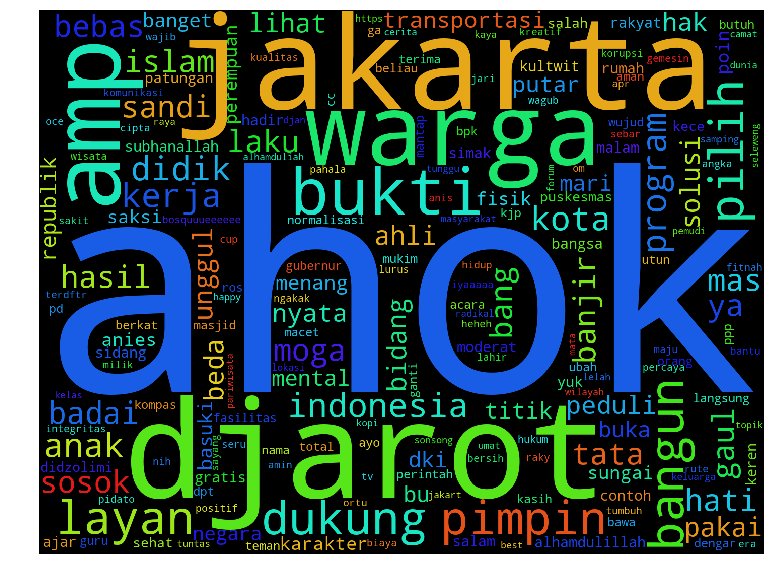

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(" ".join(seriesPositif.astype(str)))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')
plt.gcf()

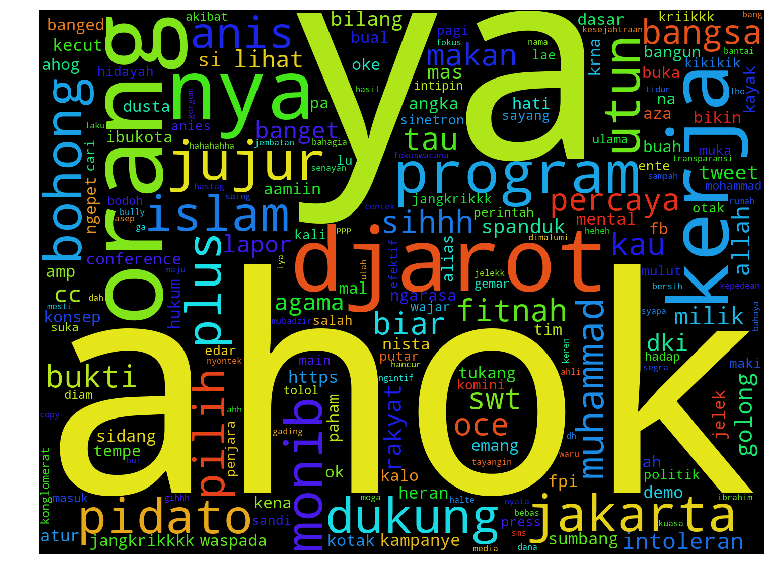

In [22]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(" ".join(seriesNegatif.astype(str)))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')
plt.gcf()

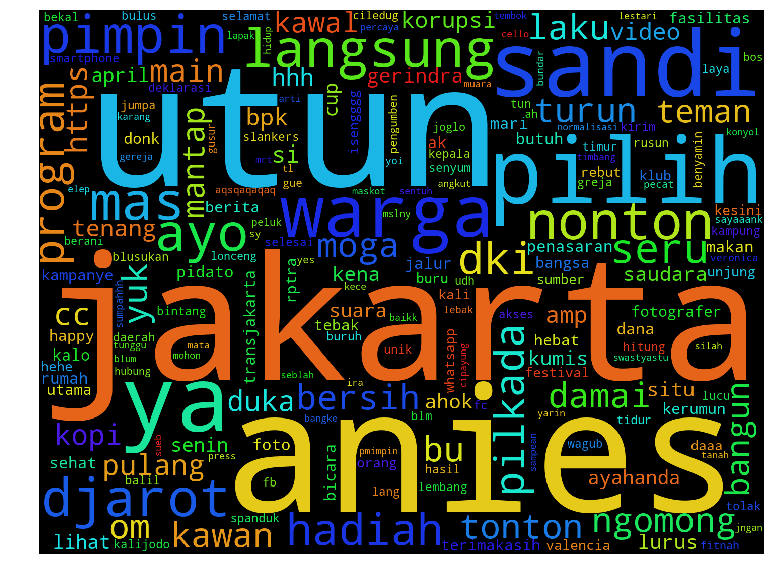

In [23]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(" ".join(seriesNetral.astype(str)))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')
plt.gcf()